In [ ]:
# Import pustaka yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori, association_rules
from tabulate import tabulate

In [ ]:
# Membaca file
data = pd.read_csv('supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Memproses data
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
len(data)

1000

In [ ]:
df2 = data.copy()

In [ ]:
# Preprocess the Data (For Visualization)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

months = ["january", "february", "march", "april", "may", "june", "july", "august", "septembre", "octobre", "novembre", "decembre"]

data["day"] = data["Date"].apply(lambda x : x.day)
data['Month_Name'] = data['Date'].dt.month.apply(lambda x: months[x-1])
data["year"] = data["Date"].apply(lambda x : x.year)

In [ ]:
data = data.drop("Date", axis=1)
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,Month_Name,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,january,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,8,march,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,march,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,january,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,february,2019


In [ ]:
# Exploratory Data Analysis

In [ ]:
len(data["Invoice ID"].value_counts())

1000

In [ ]:
val_counts = dict(data["Product line"].value_counts()[:10])

<Axes: >

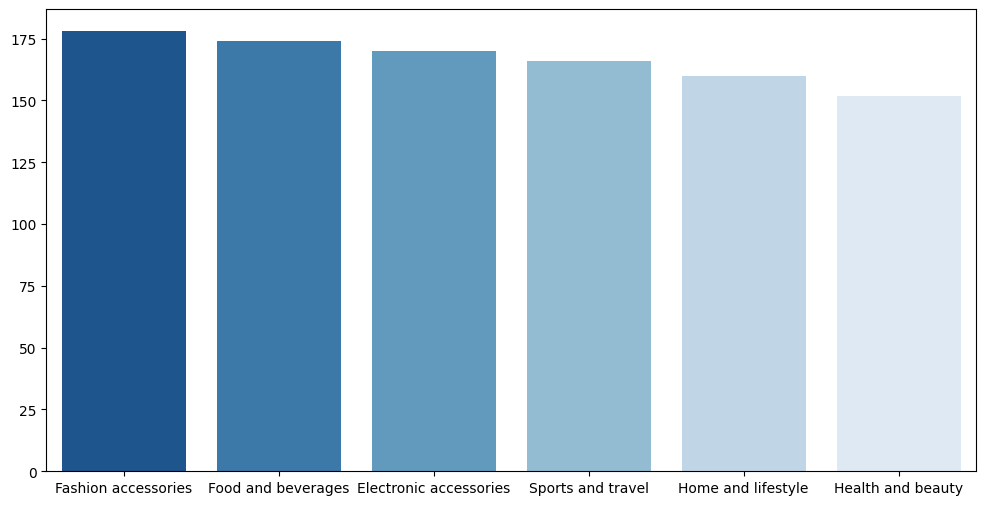

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), palette="Blues_r")

In [ ]:
payment = dict(data.groupby("Payment")["Product line"].count().sort_values(ascending=False))

In [ ]:
explode = [0] * len(payment)
explode[1] = 0.01 if len(payment) > 1 else 0
explode[2] = 0.2 if len(payment) > 2 else 0

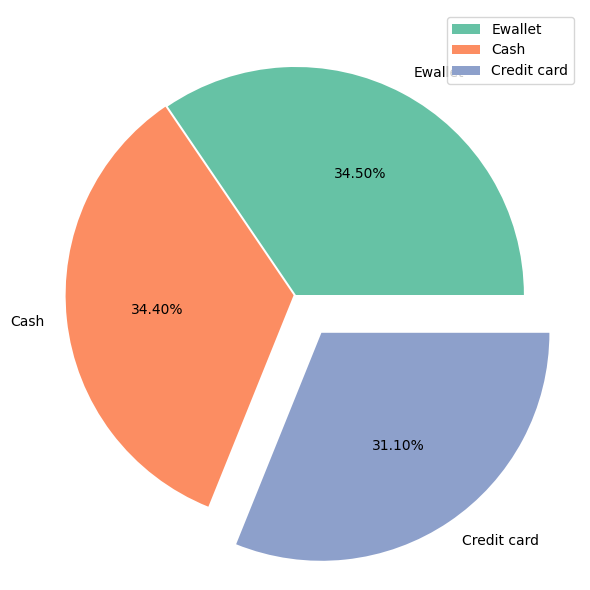

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(payment.values(), labels=payment.keys(), explode=explode, colors=sns.color_palette("Set2")[:len(payment)], autopct='%.2f%%')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
gender = dict(data.groupby("Gender")["Product line"].count().sort_values(ascending=False))

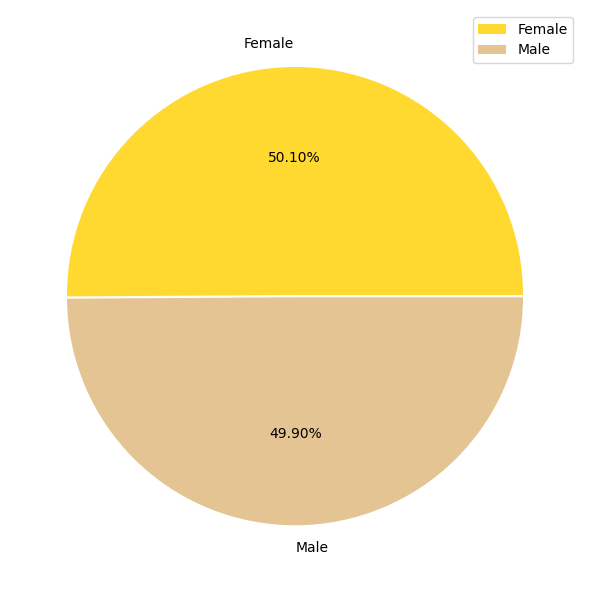

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(gender.values(), labels=gender.keys(), explode = [0, 0.01], colors = sns.color_palette("Set2")[5:7], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month = dict(data.groupby("Month_Name")["Product line"].count())

ordered_months = ["january", "february", "march", "april", "may", "june", "july", "august", "septembre", "octobre", "novembre", "decembre"]
sorted_month = {k: month[k] for k in ordered_months if k in month}

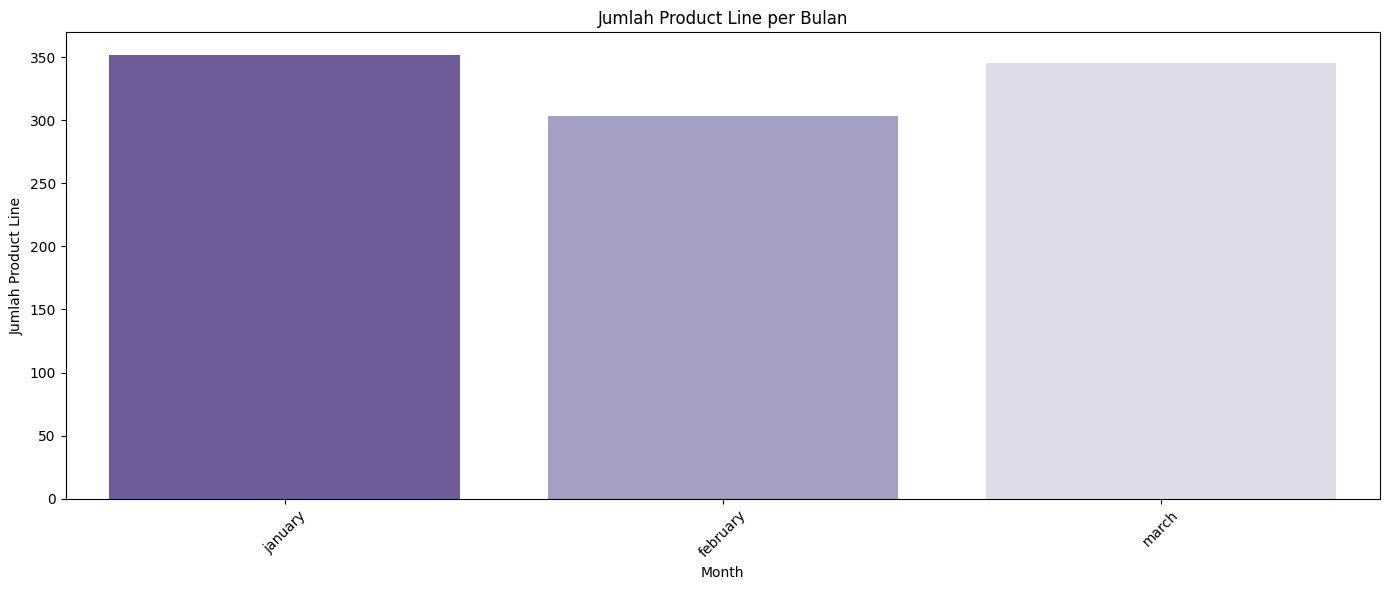

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=list(sorted_month.keys()), y=list(sorted_month.values()), palette="Purples_r")
plt.title('Jumlah Product Line per Bulan')
plt.xlabel('Month')
plt.ylabel('Jumlah Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Preprocess the Data (For Frequent Pattern Mining)

In [ ]:
val_counts = data["Product line"].value_counts()
val_counts

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [ ]:
excluded = list(val_counts[val_counts.values < 2].index)

In [ ]:
invoices = []
for action in data["Invoice ID"].unique():
    if action not in excluded:
        invoice = data[data["Invoice ID"] == action]['Product line'].tolist()
        if len(invoice) > 0:
            invoices.append(invoice)

In [ ]:
len(invoices)

1000

In [ ]:
invoices[0:20]

[['Health and beauty'],
 ['Electronic accessories'],
 ['Home and lifestyle'],
 ['Health and beauty'],
 ['Sports and travel'],
 ['Electronic accessories'],
 ['Electronic accessories'],
 ['Home and lifestyle'],
 ['Health and beauty'],
 ['Food and beverages'],
 ['Fashion accessories'],
 ['Electronic accessories'],
 ['Electronic accessories'],
 ['Food and beverages'],
 ['Health and beauty'],
 ['Sports and travel'],
 ['Health and beauty'],
 ['Sports and travel'],
 ['Food and beverages'],
 ['Home and lifestyle']]

In [ ]:
# Implementing the Apriori Algorithm

In [ ]:
from itertools import combinations

In [ ]:
def item_counter(data):
    counts = {}
    for action in data:
        for item in action:
            counts[item]=0
    for action in data:
        for item in action:
            counts[item] += 1

    return counts

In [ ]:
def remove_non_sup(dic, min_sup):
    non_freq = []
    for k,v in dic.items():
        if v < min_sup:
            non_freq.append(k)
    [dic.pop(key) for key in non_freq]
    return dic

In [ ]:
def check_valid_pairs(data, pairs):
    valid_pairs=[]
    for action in data:
        for pair in pairs:
            if all(x in action for x in pair):
                valid_pairs.append(pair)
    return list(set(valid_pairs))

In [ ]:
def pair_counter(data, val_pairs):
    counts = {}
    for action in data:
        for pair in val_pairs:
            counts[pair]=0
    for action in data:
        for pair in val_pairs:
            if all(x in action for x in pair):
                counts[pair] += 1
    return counts

In [ ]:
def unique_items(dic, chk):
    uniques = []
    for i in range(len(list(dic.keys()))):
        for j in range(chk):
            uniques.append(list(dic.keys())[i][j])
    return list(set(uniques))

In [ ]:
check = 2
prev_counts = {}
def apriori(data, min_sup):
    res_counts = item_counter(data)
    new_counts = remove_non_sup(res_counts, min_sup)
    all_pairs = list(combinations(list(new_counts.keys()), 2))
    def iteration(data, pairs, min_sup):
        global check, prev_counts
        valid_pairs = check_valid_pairs(data, pairs)
        res_counts = pair_counter(data, valid_pairs)
        new_counts = remove_non_sup(res_counts, min_sup)
        unq_item = unique_items(new_counts, check)
        check += 1
        all_pairs = list(combinations(unq_item, check))
        if len(all_pairs) != 0:
            prev_counts = new_counts
            iteration(data, all_pairs, min_sup)
        check = 2
        return prev_counts

    return iteration(data, all_pairs, min_sup)

In [ ]:
freq = apriori(invoices, 500)
freq

{}

In [ ]:
# Taking the Final Result and Compare with the Actual Algorithm

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(invoices).transform(invoices)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,False,False,False,True,False,False
1,True,False,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,True,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
995,False,False,False,True,False,False
996,False,False,False,False,True,False
997,False,False,True,False,False,False
998,False,False,False,False,True,False


In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.0001, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets["support"] = frequent_itemsets["support"].apply(lambda x: round(x*100, 2))
all_freq = frequent_itemsets.sort_values(by="support", ascending=False).reset_index().drop("index", axis=1)
all_freq.head()

,support,itemsets,length
0,17.8,(Fashion accessories),1
1,17.4,(Food and beverages),1
2,17.0,(Electronic accessories),1
3,16.6,(Sports and travel),1
4,16.0,(Home and lifestyle),1


In [ ]:
freq_len_2 = frequent_itemsets[(frequent_itemsets['length'] == 2)].sort_values(by="support", ascending=False).reset_index().drop("index", axis=1)
freq_len_2.head()

,support,itemsets,length


In [ ]:
freq_len_3 = frequent_itemsets[(frequent_itemsets['length'] == 3)].sort_values(by="support", ascending=False).reset_index().drop("index", axis=1)
freq_len_3.head()

,support,itemsets,length


In [ ]:
freq_len_4 = frequent_itemsets[(frequent_itemsets['length'] == 4)].sort_values(by="support", ascending=False).reset_index().drop("index", axis=1)
freq_len_4.head()

,support,itemsets,length


In [ ]:
freq_len_5 = frequent_itemsets[(frequent_itemsets['length'] == 5)].sort_values(by="support", ascending=False).reset_index().drop("index", axis=1)
freq_len_5.head()

,support,itemsets,length


In [ ]:
round(100 / len(invoices), 2)

0.1

In [ ]:
def confidence_on_items(x, y, min_conf=0):
    x1 = [t for t in invoices if x in t]
    y1 = [t for t in invoices if y in t]
    x_U_y = [common for common in x1 if y in common]
    conf_x_y = round(len(x_U_y)/len(x1)*100,2)
    conf_y_x = round(len(x_U_y)/len(y1)*100,2)
    if conf_x_y >= min_conf:
        print(f"Confidence of {x} on {y} is {conf_x_y}")
    if conf_y_x >= min_conf:
        print(f"Confidence of {y} on {x} is {conf_y_x}")

In [ ]:
def confidence_on_sets(x, y, min_conf=0):
    if type(x) == str:
        x1 = [t for t in invoices if x in t]
    else:
        x1 = [t for t in invoices if all(s in t for s in x)]
    if type(y) == str:
        y1 = [t for t in invoices if y in t]
    else:
        y1 = [t for t in invoices if all(s in t for s in y)]

    if type(x) == str and type(y) == list:
        inp_list = y.copy()
        y.append(x)
        union = [t for t in invoices if all(s in t for s in y)]
        conf_x_y = round(len(union)/len(x1)*100,2)
        conf_y_x = round(len(union)/len(y1)*100,2)
        if conf_x_y >= min_conf:
            print(f"Confidence of {x} on {inp_list} is {conf_x_y}")
        if conf_y_x >= min_conf:
            print(f"Confidence of {inp_list} on {x} is {conf_y_x}")
    elif type(x) == list and type(y) == str:
        inp_list = x.copy()
        x.append(y)
        union = [t for t in invoices if all(s in t for s in x)]
        conf_x_y = round(len(union)/len(x1)*100,2)
        conf_y_x = round(len(union)/len(y1)*100,2)
        if conf_x_y >= min_conf:
            print(f"Confidence of {x} on {inp_list} is {conf_x_y}")
        if conf_y_x >= min_conf:
            print(f"Confidence of {inp_list} on {x} is {conf_y_x}")
    elif type(x) == list and type(y) == list:
        uni_list = x+y
        union = [t for t in invoices if all(s in t for s in uni_list)]
        conf_x_y = round(len(union)/len(x1)*100,2)
        conf_y_x = round(len(union)/len(y1)*100,2)
        if conf_x_y >= min_conf:
            print(f"Confidence of {x} on {y} is {conf_x_y}")
        if conf_y_x >= min_conf:
            print(f"Confidence of {y} on {x} is {conf_y_x}")

In [ ]:
def item_combinations(items):
    lst = []
    if len(items) == 3:
        for i in range(len(items)):
            lst.append([items[i], [items[i-1], items[i-2]]])
    elif len(items) == 4:
        for i in range(len(items)):
            lst.append([items[i], [items[i-1], items[i-2], items[i-3]]])
    return lst

In [ ]:
list(freq_len_3["itemsets"][0])

['Fashion accessories', 'Food and beverages ', 'Electronic accessories']

In [ ]:
freq_len_3 = {
    "itemsets": [
        ["Fashion accessories", "Food and beverages ", "Electronic accessories"],
        ["Sports and travel ", "Home and lifestyle ", "Health and beauty "]
    ]
}

def item_combinations(itemset):
    return list(itertools.combinations(itemset, 2))

In [ ]:
second_itemset = list(freq_len_3["itemsets"][1])

In [ ]:
combs = item_combinations(second_itemset)
combs

[('Sports and travel ', 'Home and lifestyle '),
 ('Sports and travel ', 'Health and beauty '),
 ('Home and lifestyle ', 'Health and beauty ')]

In [ ]:
freq_len_2 = {
    "itemsets": [
        ["Fashion accessories", "Food and beverages "],
        ["Electronic accessories", "Sports and travel"],
        ["Home and lifestyle ", "Health and beauty "]
    ]
}

def item_combinations(itemset):
    return list(itertools.combinations(itemset, 2))

def confidence_on_sets(item1, item2, threshold):
  threshold

In [ ]:
for i in range(len(freq_len_2["itemsets"])):
    combs = item_combinations(list(freq_len_2["itemsets"][i]))
    for j in range(len(combs)):
        confidence_on_sets(combs[j][0], combs[j][1], 25)

In [ ]:
freq_len_3 = {
    "itemsets": [
        ["Fashion accessories", "Food and beverages ", "Electronic accessories"],
        ["Sports and travel ", "Home and lifestyle ", "Health and beauty "]
    ]
}

def item_combinations(itemset):
    return list(itertools.combinations(itemset, 2))

def confidence_on_sets(item1, item2, threshold):
  threshold

for i in range(len(freq_len_3["itemsets"])):
    combs = item_combinations(list(freq_len_3["itemsets"][i]))
    for j in range(len(combs)):
        confidence_on_sets(combs[j][0], combs[j][1], 25)

In [ ]:
# APRIORI

In [ ]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [ ]:
frequent_itemsets.count()['itemsets']

6

In [ ]:
frequent_itemsets.nlargest(n = 15, columns = 'support')

,support,itemsets
1,0.178,(Fashion accessories)
2,0.174,(Food and beverages)
0,0.170,(Electronic accessories)
5,0.166,(Sports and travel)
4,0.160,(Home and lifestyle)
3,0.152,(Health and beauty)


<Axes: xlabel='itemsets', ylabel='support'>

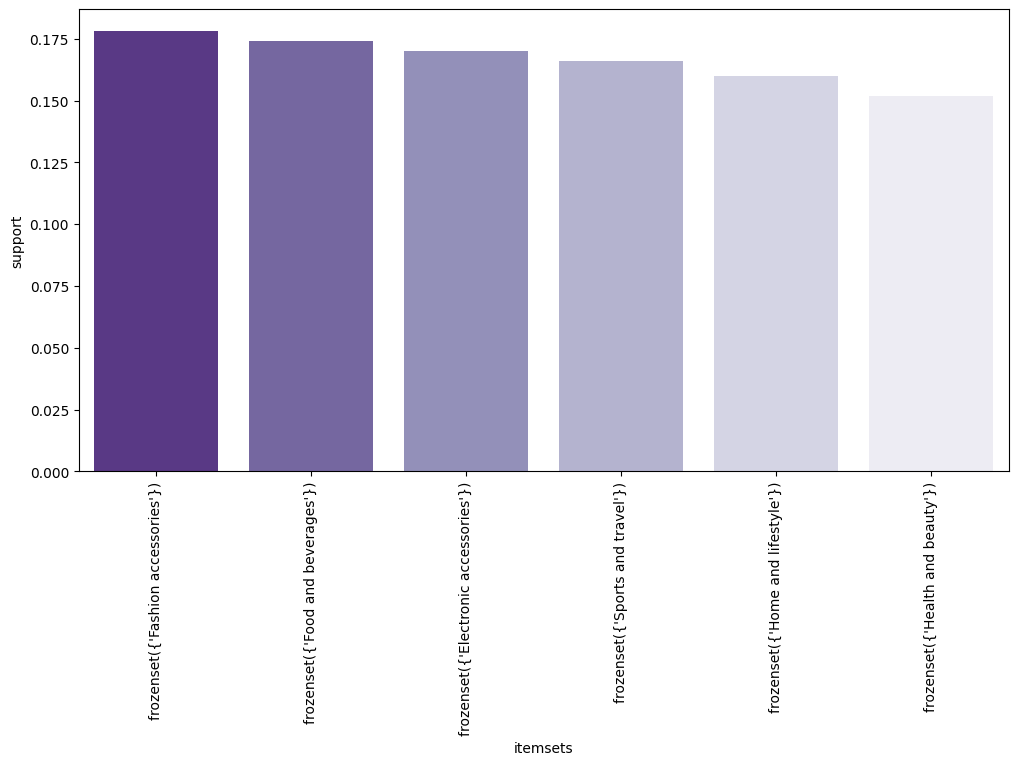

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x='itemsets', y='support', data=frequent_itemsets.nlargest(n = 15, columns = 'support'), palette="Purples_r")

In [ ]:
confidence_association = association_rules(frequent_itemsets, metric='lift', min_threshold=0.2)

In [ ]:
confidence_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
